In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numpy version :  1.23.5
pandas version :  1.5.3
seaborn version :  0.12.2


# Data Preprocessing

In [8]:
city = pd.read_csv('city_hour.csv')
city.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [9]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


## Missing Values

In [10]:
city.isna().sum()

City               0
Datetime           0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
Benzene       163646
Toluene       220607
Xylene        455829
AQI           129080
AQI_Bucket    129080
dtype: int64

In [11]:
# portion missing values considering all column
((city.shape[0] - city.dropna().shape[0])/city.shape[0])*100

81.73731237859792

In [12]:
city['PM2.5']=city['PM2.5'].fillna((city['PM2.5'].median()))
city['PM10']=city['PM10'].fillna((city['PM10'].median()))
city['NO']=city['NO'].fillna((city['NO'].median()))
city['NO2']=city['NO2'].fillna((city['NO2'].median()))
city['NOx']=city['NOx'].fillna((city['NOx'].median()))
city['NH3']=city['NH3'].fillna((city['NH3'].median()))
city['CO']=city['CO'].fillna((city['CO'].median()))
city['SO2']=city['SO2'].fillna((city['SO2'].median()))
city['O3']=city['O3'].fillna((city['O3'].median()))
city['Benzene']=city['Benzene'].fillna((city['Benzene'].median()))
city['Toluene']=city['Toluene'].fillna((city['Toluene'].median()))
city['Xylene']=city['Xylene'].fillna((city['Xylene'].median()))
city['AQI']=city['AQI'].fillna((city['AQI'].median()))
city['AQI_Bucket']=city['AQI_Bucket'].fillna('Moderate')

In [13]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       707875 non-null  float64
 3   PM10        707875 non-null  float64
 4   NO          707875 non-null  float64
 5   NO2         707875 non-null  float64
 6   NOx         707875 non-null  float64
 7   NH3         707875 non-null  float64
 8   CO          707875 non-null  float64
 9   SO2         707875 non-null  float64
 10  O3          707875 non-null  float64
 11  Benzene     707875 non-null  float64
 12  Toluene     707875 non-null  float64
 13  Xylene      707875 non-null  float64
 14  AQI         707875 non-null  float64
 15  AQI_Bucket  707875 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


## Duplicated values

In [14]:
city.duplicated().sum()

0

In [15]:
import datetime as dt

In [16]:
city['Datetime'] = pd.to_datetime(city['Datetime'])
city['year'] = city['Datetime'].dt.year
city['month'] =city['Datetime'].dt.month
city['time'] =city['Datetime'].dt.time
city ['week'] =city['Datetime'].dt.week
city ['day'] =city['Datetime'].dt.day
city.drop('Datetime',axis=1,inplace=True)

In [17]:
city.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,time,week,day
0,Ahmedabad,46.42,91.5,1.00,40.01,36.37,15.38,1.00,122.07,26.24,0.0,0.0,0.0,116.0,Moderate,2015,1,01:00:00,1,1
1,Ahmedabad,46.42,91.5,0.02,27.75,19.73,15.38,0.02,85.90,26.24,0.0,0.0,0.0,116.0,Moderate,2015,1,02:00:00,1,1
2,Ahmedabad,46.42,91.5,0.08,19.32,11.08,15.38,0.08,52.83,26.24,0.0,0.0,0.0,116.0,Moderate,2015,1,03:00:00,1,1
3,Ahmedabad,46.42,91.5,0.30,16.45,9.20,15.38,0.30,39.53,153.58,0.0,0.0,0.0,116.0,Moderate,2015,1,04:00:00,1,1
4,Ahmedabad,46.42,91.5,0.12,14.90,7.85,15.38,0.12,32.63,26.24,0.0,0.0,0.0,116.0,Moderate,2015,1,05:00:00,1,1


In [18]:
numericals = ['PM2.5', 'PM10', 'NO', 'NO', 'NO2', 'NOx',
              'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene',
              'Xylene', 'AQI', 'year', 'month', 'week']

categoricals = ['City', 'AQI_Bucket', 'time']

In [19]:
city[numericals].describe()

,PM2.5,PM10,NO,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,year,month,week
count,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000
mean,63.277170,107.516191,15.862803,15.862803,27.468002,30.286116,20.440077,2.014442,12.994346,33.236714,2.572621,6.768942,1.623372,157.220670,2017.886277,6.266540,25.480812
std,67.180795,80.587300,29.541480,29.541480,26.830097,36.393065,22.962005,10.288245,17.575227,27.151205,14.460070,18.255729,4.807554,147.875781,1.533115,3.433097,14.943341
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000,2015.000000,1.000000,1.000000
25%,30.980000,79.570000,4.570000,4.570000,12.420000,12.820000,12.270000,0.480000,5.560000,16.150000,0.200000,1.150000,0.790000,87.000000,2017.000000,3.000000,13.000000
50%,46.420000,91.500000,7.960000,7.960000,20.320000,20.790000,15.380000,0.800000,8.370000,26.240000,0.860000,2.590000,0.790000,116.000000,2018.000000,6.000000,24.000000
75%,68.240000,102.830000,13.340000,13.340000,31.850000,32.270000,19.680000,1.250000,12.740000,41.500000,2.000000,5.030000,0.790000,177.000000,2019.000000,9.000000,38.000000
max,999.990000,1000.000000,499.990000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000,2020.000000,12.000000,53.000000


In [20]:
city[categoricals].describe()

,City,AQI_Bucket,time
count,707875,707875,707875
unique,26,6,24
top,Ahmedabad,Moderate,00:00:00
freq,48192,328071,29505


## Encode Data

In [21]:
map_City = {
    'Ahmedabad' : 1,
    'Aizawl' : 2,
    'Amaravati' : 3,
    'Amritsar' : 4,
    'Bengaluru' : 5,
    'Bhopal' : 6,
    'Brajrajnagar' : 7,
    'Chandigarh'  : 8,
    'Chennai' : 9,
    'Coimbatore' : 10,
    'Delhi' : 11,
    'Ernakulam' : 12,
    'Gurugram' : 13,
    'Guwahati' : 14,
    'Hyderabad' : 15,
    'Jaipur' : 16,
    'Jorapokhar' : 17,
    'Kochi' : 18,
    'Kolkata' : 19,
    'Lucknow' : 20,
    'Mumbai' : 21,
    'Patna' : 22,
    'Shillong' : 23,
    'Talcher' : 24,
    'Thiruvananthapuram' : 25,
    'Visakhapatnam' : 26
    }
city['city_lencode'] = city['City'].map(map_City)
city[['City', 'city_lencode']]

,City,city_lencode
0,Ahmedabad,1
1,Ahmedabad,1
2,Ahmedabad,1
3,Ahmedabad,1
4,Ahmedabad,1
...,...,...
707870,Visakhapatnam,26
707871,Visakhapatnam,26
707872,Visakhapatnam,26
707873,Visakhapatnam,26


AQI Category (Range)
- Good (0-50)
- Satisfactory (51-100)
- Moderate (101-200)
- Poor (201-300)
- Very poor (301-400)
- Severe (401-500)

In [22]:
map_AQI = {
    'Good' :6,
    'Satisfactory' :5,
    'Moderate' :4,
    'Poor' : 3,
    'Very poor' :2,
    'Severe' :1
    }
city['AQI_lencode'] = city['AQI_Bucket'].map(map_AQI)
city[['AQI_Bucket', 'AQI_lencode']]

,AQI_Bucket,AQI_lencode
0,Moderate,4.0
1,Moderate,4.0
2,Moderate,4.0
3,Moderate,4.0
4,Moderate,4.0
...,...,...
707870,Satisfactory,5.0
707871,Satisfactory,5.0
707872,Good,6.0
707873,Good,6.0


In [23]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   City          707875 non-null  object 
 1   PM2.5         707875 non-null  float64
 2   PM10          707875 non-null  float64
 3   NO            707875 non-null  float64
 4   NO2           707875 non-null  float64
 5   NOx           707875 non-null  float64
 6   NH3           707875 non-null  float64
 7   CO            707875 non-null  float64
 8   SO2           707875 non-null  float64
 9   O3            707875 non-null  float64
 10  Benzene       707875 non-null  float64
 11  Toluene       707875 non-null  float64
 12  Xylene        707875 non-null  float64
 13  AQI           707875 non-null  float64
 14  AQI_Bucket    707875 non-null  object 
 15  year          707875 non-null  int64  
 16  month         707875 non-null  int64  
 17  time          707875 non-null  object 
 18  week

In [24]:
city['AQI_lencode']=city['AQI_lencode'].fillna((city['AQI_lencode'].median()))

# Exploratory Data Analysis

In [25]:
city.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,Xylene,AQI,AQI_Bucket,year,month,time,week,day,city_lencode,AQI_lencode
0,Ahmedabad,46.42,91.5,1.00,40.01,36.37,15.38,1.00,122.07,26.24,...,0.0,116.0,Moderate,2015,1,01:00:00,1,1,1,4.0
1,Ahmedabad,46.42,91.5,0.02,27.75,19.73,15.38,0.02,85.90,26.24,...,0.0,116.0,Moderate,2015,1,02:00:00,1,1,1,4.0
2,Ahmedabad,46.42,91.5,0.08,19.32,11.08,15.38,0.08,52.83,26.24,...,0.0,116.0,Moderate,2015,1,03:00:00,1,1,1,4.0
3,Ahmedabad,46.42,91.5,0.30,16.45,9.20,15.38,0.30,39.53,153.58,...,0.0,116.0,Moderate,2015,1,04:00:00,1,1,1,4.0
4,Ahmedabad,46.42,91.5,0.12,14.90,7.85,15.38,0.12,32.63,26.24,...,0.0,116.0,Moderate,2015,1,05:00:00,1,1,1,4.0


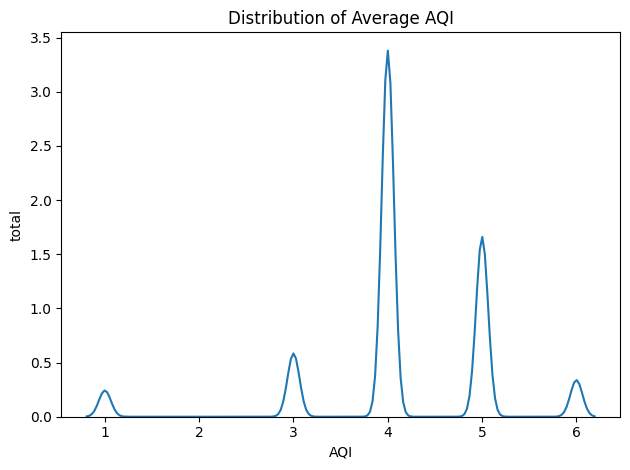

In [28]:
ax = sns.kdeplot(x = 'AQI_lencode', data=city)
ax.set_title("Distribution of Average AQI")
ax.set_ylabel("total")
ax.set_xlabel("AQI")
plt.tight_layout()

AQI Category (Range)
- Good  (0-50) : 6
- Satisfactory (51-100) : 5
- Moderate (101-200) : 4
- Poor (201-300) : 3
- Very poor (301-400) : 2
- Severe (401-500) : 1

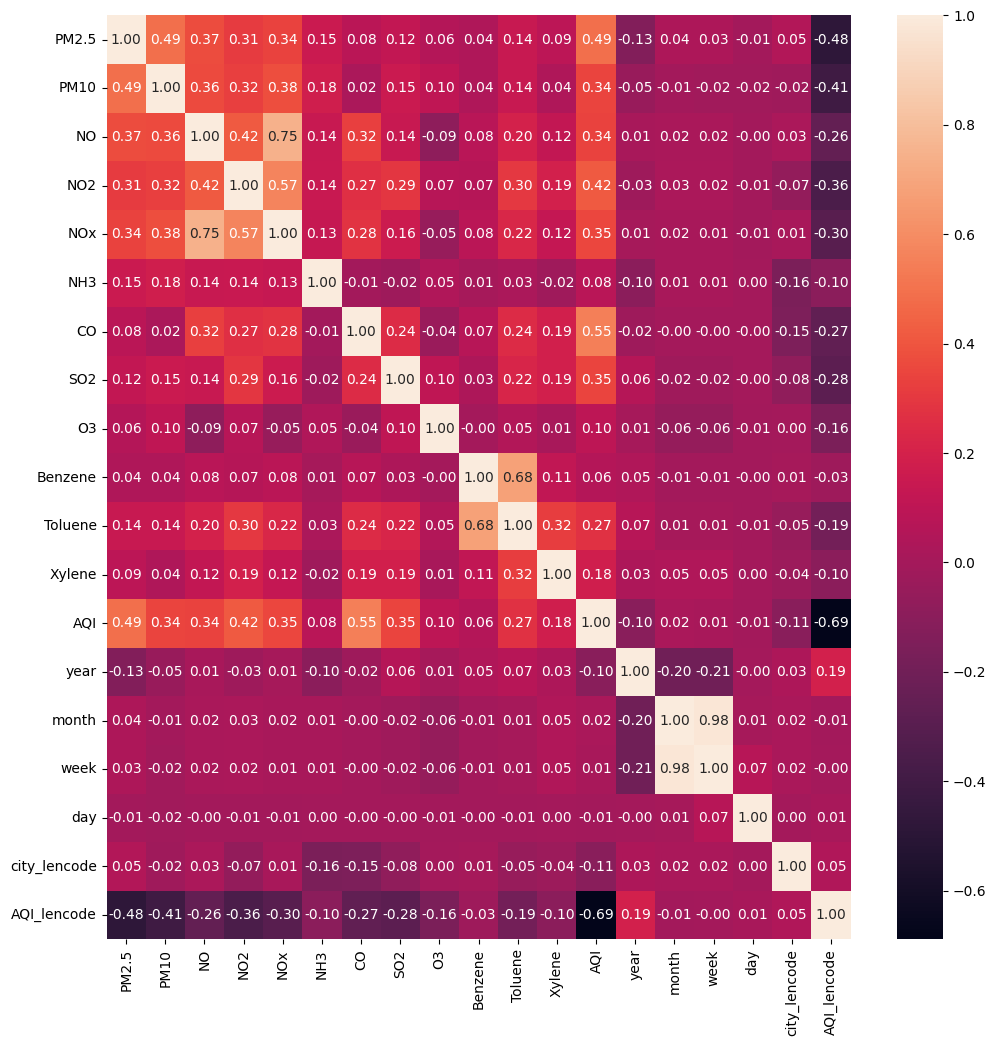

In [29]:
corr = city.corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()


### Feature Selection :
### Fitur yang nilai korelasinya rendah dan dianggap tidak berhubungan dalam penyelesaian masalah akan didrop dari dataset, diantaranya fitur:
- City
- PM 2.5
- PM 10
- NO2
- NOx
- NH3
- SO2
- O3
- Benzene
- Toluene
- Xylene
- year
- month
- week
- day
- time
- city_lencode
- AQI_lencode

In [59]:
cityc = city.copy()

In [61]:
cityc = city.drop([
    'City', 'time', 'PM2.5', 'PM10', 'NO2', 'NOx', 'NH3', 'SO2', 'O3',
    'Benzene', 'Toluene', 'Xylene', 'year', 'week', 'month', 'day',
    'city_lencode', 'AQI_Bucket'
], axis = 1)

In [62]:
cityc.head()

,NO,CO,AQI,AQI_lencode
0,1.00,1.00,116.0,4.0
1,0.02,0.02,116.0,4.0
2,0.08,0.08,116.0,4.0
3,0.30,0.30,116.0,4.0
4,0.12,0.12,116.0,4.0


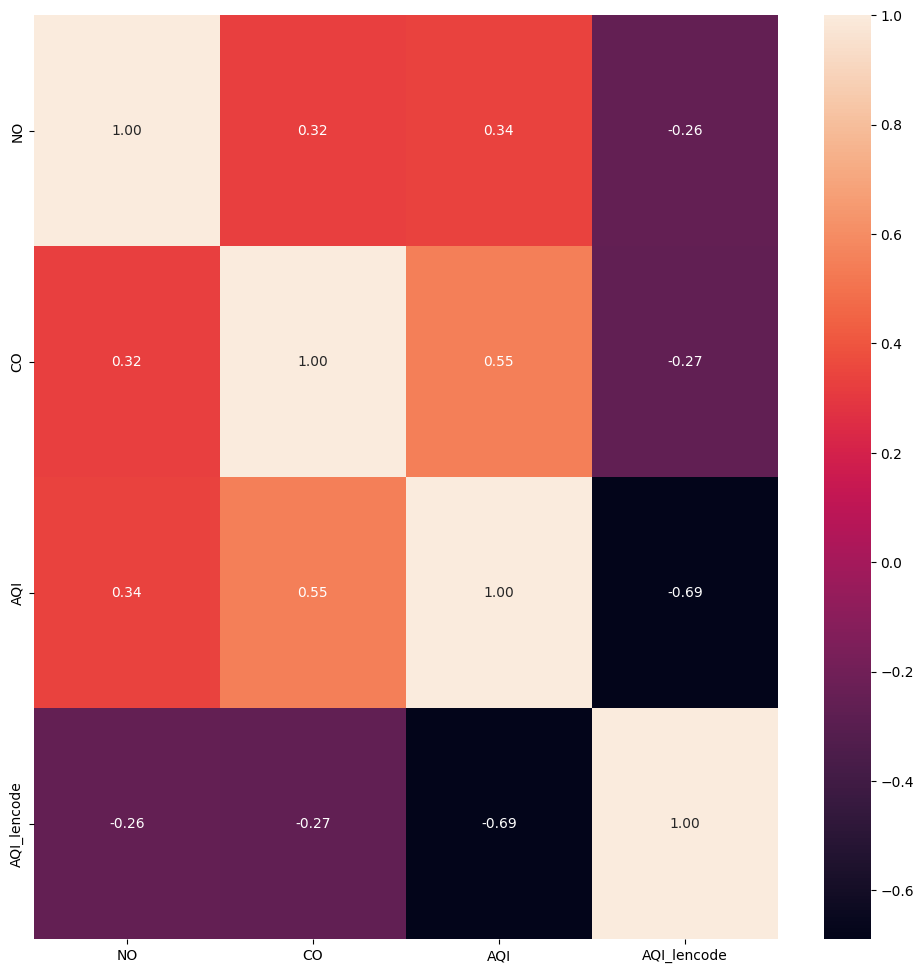

In [63]:
corr = cityc.corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [64]:
cityc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   NO           707875 non-null  float64
 1   CO           707875 non-null  float64
 2   AQI          707875 non-null  float64
 3   AQI_lencode  707875 non-null  float64
dtypes: float64(4)
memory usage: 21.6 MB


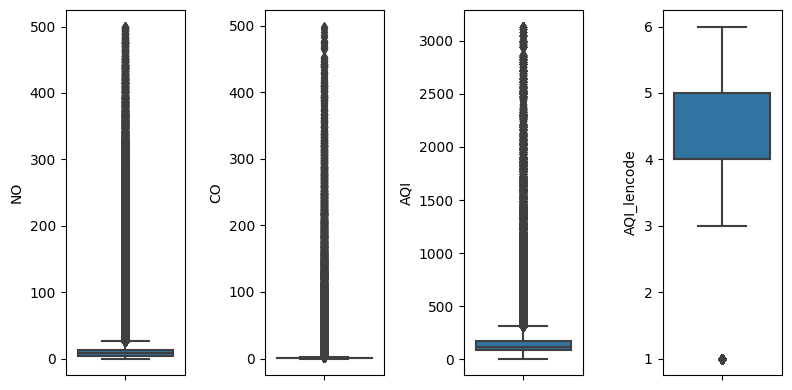

In [66]:
nums=['NO','CO', 'AQI','AQI_lencode']
plt.figure(figsize = (12,4))
for i in range(0, len(nums)):
    plt.subplot(1, 6, i+1)
    sns.boxplot(y = cityc[nums[i]], orient='v')
    plt.tight_layout()

In [67]:
print(f'Jumlah baris sebelum memfilter outlier: {len(cityc)}')

fil_outl = np.array([True] * len(cityc))
for col in ['NO','CO','AQI', 'AQI_lencode']:
    Q1 = cityc[col].quantile(0.25)
    Q3 = cityc[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    fil_outl = ((cityc[col] >= low_limit) & (cityc[col] <= high_limit)) & fil_outl

cityc = cityc[fil_outl].reset_index()


print('Jumlah baris setelah memfilter outlier', len(cityc))

Jumlah baris sebelum memfilter outlier: 707875
Jumlah baris setelah memfilter outlier 540875


# Standardization

In [68]:
from sklearn.preprocessing import StandardScaler
feats = ['NO','CO','AQI', 'AQI_lencode']
X = cityc[feats].values
X_std = StandardScaler().fit_transform(X)
citys = pd.DataFrame(data=X_std, columns=feats)

In [69]:
citys.head()

,NO,CO,AQI,AQI_lencode
0,-1.285461,0.586547,0.013182,-0.532227
1,-1.472506,-1.454263,0.013182,-0.532227
2,-1.461054,-1.329316,0.013182,-0.532227
3,-1.419064,-0.871174,0.013182,-0.532227
4,-1.453419,-1.246017,0.013182,-0.532227


# Clustering : K- Means Clustering

In [70]:
## Mencari N CLuster yang pas

from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(X_std)
  nilai_inertia = kmeans.inertia_
  print('iterasi ke-',i, 'dengan nilai inertia : ',nilai_inertia)
  inertia.append(kmeans.inertia_)

iterasi ke- 1 dengan nilai inertia :  2163499.9999985807
iterasi ke- 2 dengan nilai inertia :  1494901.0786968295
iterasi ke- 3 dengan nilai inertia :  1220522.2052371479
iterasi ke- 4 dengan nilai inertia :  957578.5203063497
iterasi ke- 5 dengan nilai inertia :  787180.2002575088
iterasi ke- 6 dengan nilai inertia :  689387.522254348
iterasi ke- 7 dengan nilai inertia :  619846.7810875911
iterasi ke- 8 dengan nilai inertia :  559657.1594785018
iterasi ke- 9 dengan nilai inertia :  513255.2522232509
iterasi ke- 10 dengan nilai inertia :  475901.4508600654


<Axes: >

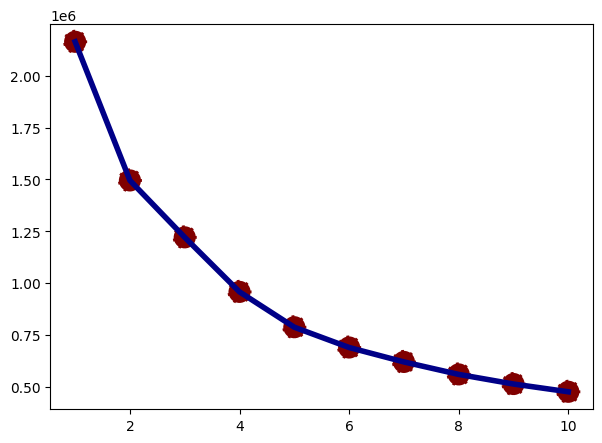

In [71]:
plt.figure(figsize=(7, 5))

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')

In [72]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_std)

KMeans(n_clusters=4, random_state=0)

In [73]:
citys['cluster'] = kmeans.labels_
citys.head()

,NO,CO,AQI,AQI_lencode,cluster
0,-1.285461,0.586547,0.013182,-0.532227,3
1,-1.472506,-1.454263,0.013182,-0.532227,3
2,-1.461054,-1.329316,0.013182,-0.532227,3
3,-1.419064,-0.871174,0.013182,-0.532227,3
4,-1.453419,-1.246017,0.013182,-0.532227,3


# Data Visualization

In [74]:
cityc['cluster'] = kmeans.labels_

In [75]:
cityc.groupby('cluster').agg(['mean','median'])

index                   NO               CO         \
                  mean    median       mean median      mean median   
cluster                                                               
0        377605.600501  356434.5   8.995254   7.96  0.935102   0.86   
1        341625.227639  340632.5   5.154731   4.40  0.601920   0.58   
2        358020.246386  328266.0  15.255831  15.16  1.179031   1.12   
3        369427.970016  394577.0   6.698871   7.96  0.591376   0.75   

                AQI        AQI_lencode         
               mean median        mean median  
cluster                                        
0        247.710066  243.0    3.165708    3.0  
1         67.570913   68.0    5.207878    5.0  
2        106.554607  104.0    4.452204    4.0  
3        126.215104  116.0    3.999825    4.0

AQI Category (Range)
- Good  (0-50) : 6
- Satisfactory (51-100) : 5
- Moderate (101-200) : 4
- Poor (201-300) : 3
- Very poor (301-400) : 2
- Severe (401-500) : 1

In [76]:
## melakukan PCA untuk melihat visualisasi
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(citys)
pcs = pca.transform(citys)

In [77]:

city_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
city_pca['cluster'] = citys['cluster']
city_pca.head()

,PC 1,PC 2,cluster
0,0.349372,-0.906522,3
1,-0.186256,-1.890998,3
2,-0.153462,-1.830724,3
3,-0.033219,-1.609719,3
4,-0.131600,-1.790541,3


<Axes: xlabel='PC 1', ylabel='PC 2'>

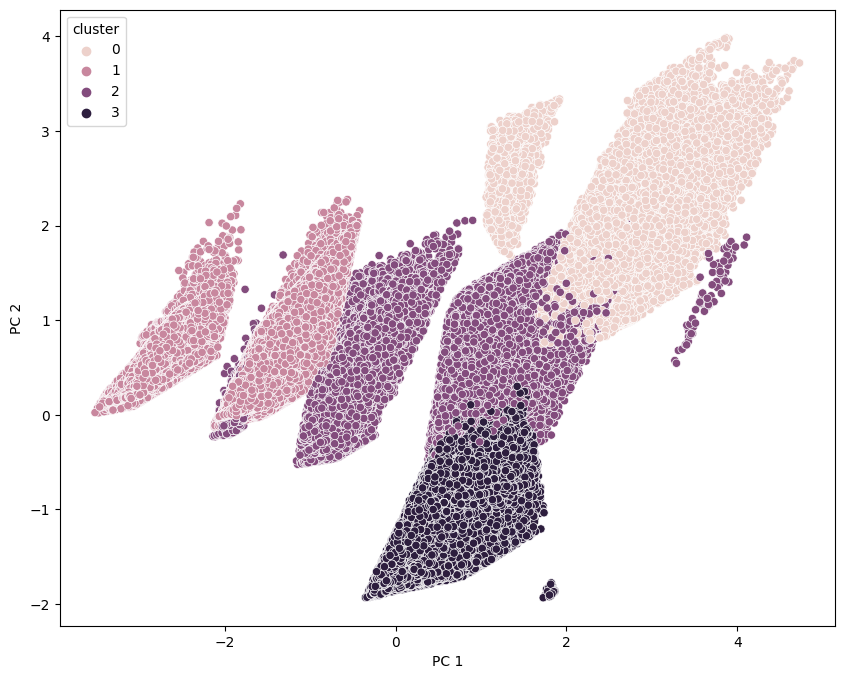

In [79]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data=city_pca, x='PC 1', y='PC 2', hue='cluster')

# Data Insight

### Based on the results of the work, it is known that the entire city can be divided into 4 clusters. The division of clusters is influenced by various features, namely the value of Carbon Monoxide levels, the value of Nitrogen Monoxide levels, the total value of AQI, the AQI level
### The explanation of each customer cluster is as follows:
### 1. Cluster 0 is a city with fairly poor air quality, with an average AQI value of 247.71, where this figure shows the AQI is at level 3 or poor. From the air quality, it is known that during these 5 years the average level of Carbon Monoxide was 0.93 mg/m3 and Nitrogen Monoxide was 8.9 ug/m3. This can affect air quality in these cities.
### 2. Cluster 1 is a city with fairly good air quality, with an average AQI value of 67.57, where this figure shows the AQI is at level 5 or satisfactory. From the air quality, it is known that for 5 years the average level of Carbon Monoxide was 0.60 mg/m3 and Nitrogen Monoxide was 5.15 ug/m3. This can affect air quality in these cities.
### 3. Cluster 2 is a city with moderate air quality, with an average AQI value of 106.55, where this figure shows the AQI is at level 4 or moderate. From the air quality, it is known that during these 5 years the average level of Carbon Monoxide was 1.17 mg/m3 and Nitrogen Monoxide was 15.16 ug/m3. This can affect air quality in these cities.
### 4. Cluster 3 is a city with moderate air quality, with an average AQI value of 126.21, where this figure shows the AQI is at level 4 or moderate. From the air quality, it is known that during these 5 years the average level of Carbon Monoxide was 0.59 mg/m3 and Nitrogen Monoxide was 6.69 ug/m3. This can affect air quality in these cities.

### Recommendation: the government can develop or increase the use of environmentally friendly fuel in clusters that have high AQI values. Apart from that, controlling air quality can also be overcome by controlling population density in the cluster.